# Analisi dei risultati dell'esperimento
L'esperimento presenta in output due file csv. Uno quando viene utilizzato l'algoritmo DRR e uno quando viene utilizzato FCFS. Il notebook ha come obiettivo quello di effettuare delle analisi statistiche per comparare le prestazioni dei due algoritmi.

## Preparazione dei dati
Prima di tutto, i 2 CSV vengono concantenati in un unico data frame.

In [1]:
import pandas as pd

n_request = 5000
df1 = pd.read_csv("fcfs.csv")
df2 = pd.read_csv("drr.csv")

df = pd.concat([df1, df2])

## Analisi tempo di attesa richieste lente
In questa sezione, vengono analizzate le prestazioni del server sulle richieste lente. In particolare, vengono comparati gli algoritmi sul tempo di attesa medio, tempo di residennza medio, e round trip time medio.

Text(0.5, 0.98, 'Andamento tempo di attesa medio delle richieste lente per al variare di richieste lente per secondo')

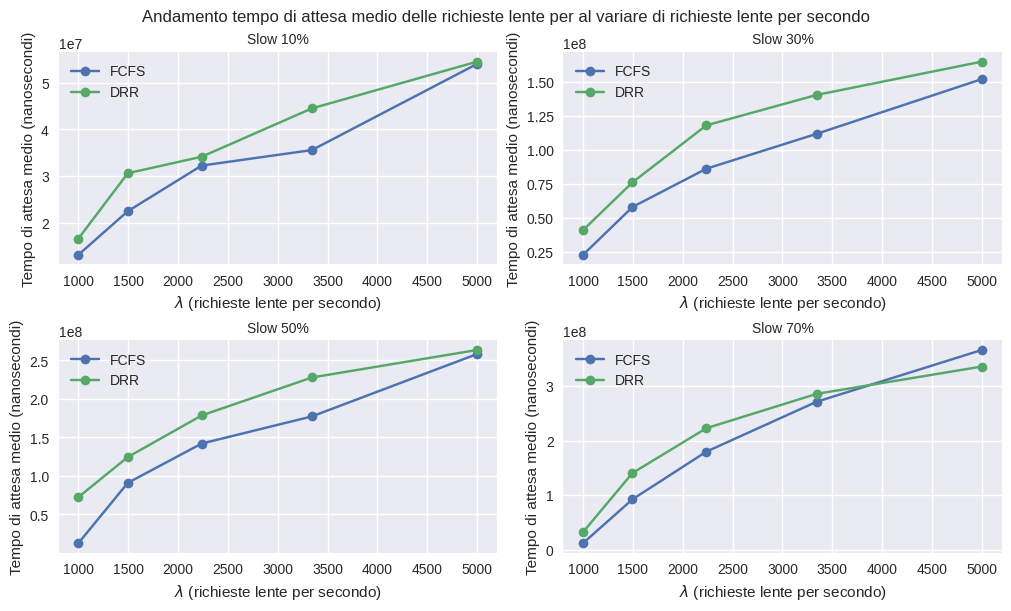

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

data = df.pivot_table(columns="sched", index=["slow_load", "slow_rate"], values="avg_slow_wt")

offset = 5

plt.style.use("seaborn")

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), constrained_layout=True)

for (ax, i) in zip(axs.flat, range(0, len(data.index.get_level_values(1)), offset)):
    percent = data.index.get_level_values(0)[i:i+offset][0]
    ax.set_title(f'Slow {percent}%', fontsize=10)
    ax.plot(data.index.get_level_values(1)[i:i+offset], data["fcfs"][i:i+offset], label="FCFS", marker="o")
    ax.plot(data.index.get_level_values(1)[i:i+offset], data["drr"][i:i+offset], label="DRR", marker="o")
    ax.set_xlabel(r"$\lambda$ (richieste lente per secondo)", fontsize=11)
    ax.set_ylabel("Tempo di attesa medio (nanosecondi)", fontsize=11)
    ax.legend()

fig.suptitle("Andamento tempo di attesa medio delle richieste lente per al variare di richieste lente per secondo")

Text(0.5, 0.98, 'Andamento tempo di attesa medio delle richieste lente per al variare di richieste veloci per secondo')

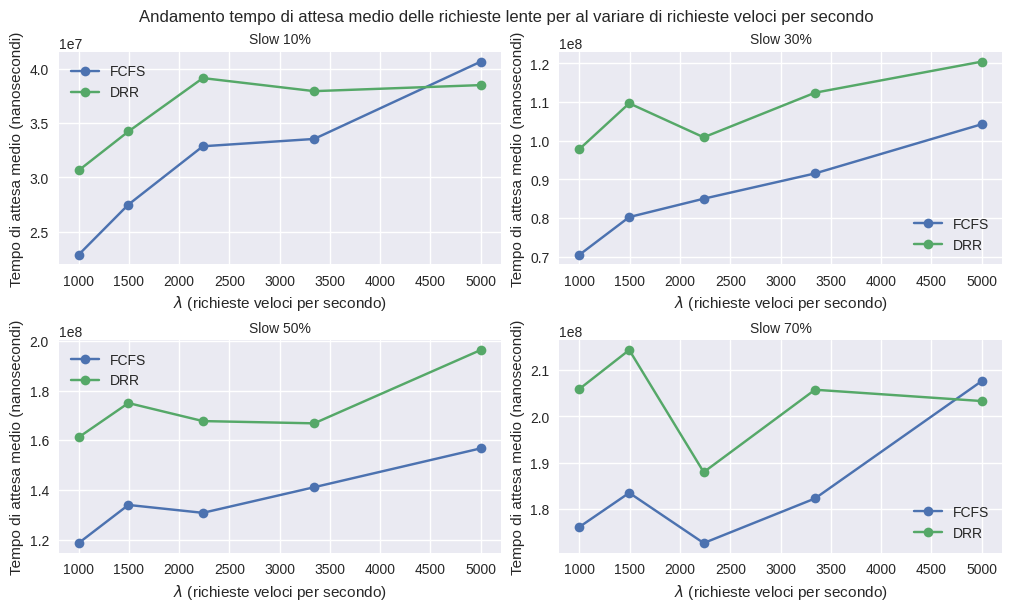

In [20]:
data = df.pivot_table(columns="sched", index=["slow_load", "fast_rate"], values="avg_slow_wt")

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), constrained_layout=True)

for (ax, i) in zip(axs.flat, range(0, len(data.index.get_level_values(1)), offset)):
    percent = data.index.get_level_values(0)[i:i+offset][0]
    ax.set_title(f'Slow {percent}%', fontsize=10)
    ax.plot(data.index.get_level_values(1)[i:i+offset], data["fcfs"][i:i+offset], label="FCFS", marker="o")
    ax.plot(data.index.get_level_values(1)[i:i+offset], data["drr"][i:i+offset], label="DRR", marker="o")
    ax.set_xlabel(r"$\lambda$ (richieste veloci per secondo)", fontsize=11)
    ax.set_ylabel("Tempo di attesa medio (nanosecondi)", fontsize=11)
    ax.legend()

fig.suptitle("Andamento tempo di attesa medio delle richieste lente per al variare di richieste veloci per secondo")

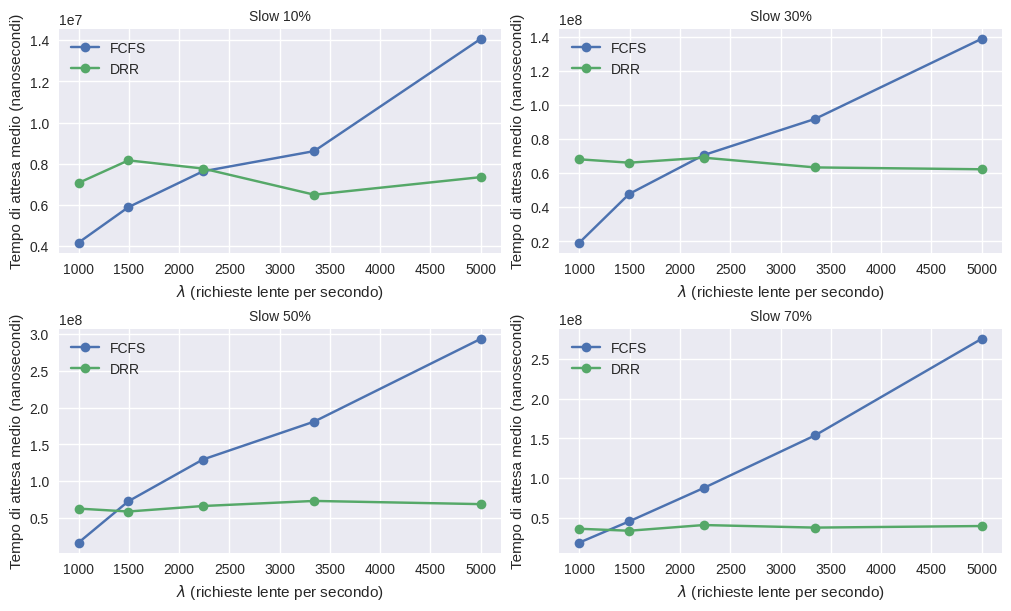

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

data = df.pivot_table(columns="sched", index=["slow_load", "slow_rate"], values="avg_fast_wt")

offset = 5

plt.style.use("seaborn")

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), constrained_layout=True)

for (ax, i) in zip(axs.flat, range(0, len(data.index.get_level_values(1)), offset)):
    percent = data.index.get_level_values(0)[i:i+offset][0]
    ax.set_title(f'Slow {percent}%', fontsize=10)
    ax.plot(data.index.get_level_values(1)[i:i+offset], data["fcfs"][i:i+offset], label="FCFS", marker="o")
    ax.plot(data.index.get_level_values(1)[i:i+offset], data["drr"][i:i+offset], label="DRR", marker="o")
    ax.set_xlabel(r"$\lambda$ (richieste lente per secondo)", fontsize=11)
    ax.set_ylabel("Tempo di attesa medio (nanosecondi)", fontsize=11)
    ax.legend()

fig.suptitle("Andamento tempo di attesa medio delle richieste veloci per al variare di richieste lente per secondo")

Text(0.5, 0.98, 'Andamento tempo di attesa medio delle richieste veloci per al variare di richieste veloci per secondo')

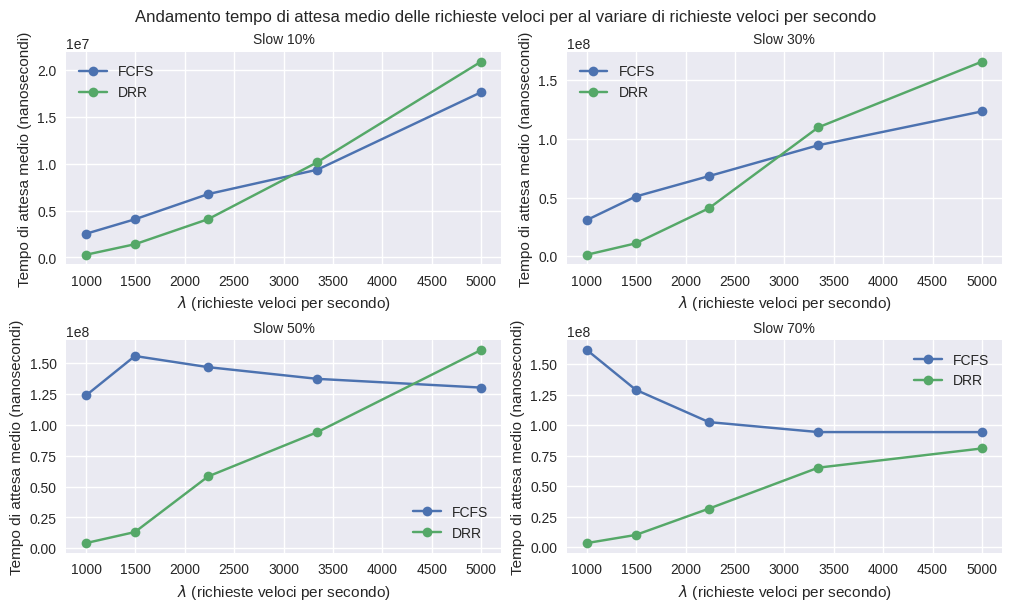

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

data = df.pivot_table(columns="sched", index=["slow_load", "fast_rate"], values="avg_fast_wt")

offset = 5

plt.style.use("seaborn")

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), constrained_layout=True)

for (ax, i) in zip(axs.flat, range(0, len(data.index.get_level_values(1)), offset)):
    percent = data.index.get_level_values(0)[i:i+offset][0]
    ax.set_title(f'Slow {percent}%', fontsize=10)
    ax.plot(data.index.get_level_values(1)[i:i+offset], data["fcfs"][i:i+offset], label="FCFS", marker="o")
    ax.plot(data.index.get_level_values(1)[i:i+offset], data["drr"][i:i+offset], label="DRR", marker="o")
    ax.set_xlabel(r"$\lambda$ (richieste veloci per secondo)", fontsize=11)
    ax.set_ylabel("Tempo di attesa medio (nanosecondi)", fontsize=11)
    ax.legend()

fig.suptitle("Andamento tempo di attesa medio delle richieste veloci per al variare di richieste veloci per secondo")

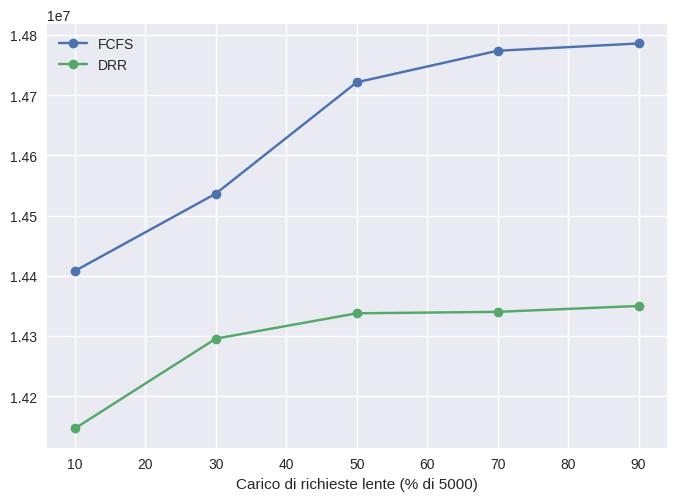

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

data = df.pivot_table(columns="sched", index="slow_load", values="avg_memory")

offset = 5

plt.style.use("seaborn")

plt.plot(data.index, data["fcfs"].values, label="FCFS", marker="o")
plt.plot(data.index, data["drr"].values, label="DRR", marker="o")
plt.xlabel(f"Carico di richieste lente (% di {n_request})")
plt.ylabel("Memoria consumata dal server (bytes)")
plt.legend()

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

data = df.pivot_table(columns="sched", index=["slow_load", "slow_rate"], values=["avg_jobs", "avg_cpu"])

offset = 5

plt.style.use("seaborn")

# fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), constrained_layout=True)

# for (ax, i) in zip(axs.flat, range(0, len(data.index.get_level_values(1)), offset)):
#     percent = data.index.get_level_values(0)[i:i+offset][0]
#     ax.set_title(f'Slow {percent}%', fontsize=10)
#     ax.plot(data.index.get_level_values(1)[i:i+offset], data["fcfs"][i:i+offset], label="FCFS", marker="o")
#     ax.plot(data.index.get_level_values(1)[i:i+offset], data["drr"][i:i+offset], label="DRR", marker="o")
#     ax.set_xlabel(r"$\lambda$ (richieste lente per secondo)", fontsize=11)
#     ax.set_ylabel("Numero medio di richieste nel sistema", fontsize=11)
#     ax.legend()

# fig.suptitle("Andamento numero medio di richieste nel sistema in base al carico di richieste lente")
print(data)

                      avg_cpu            avg_jobs          
sched                     drr      fcfs       drr      fcfs
slow_load slow_rate                                        
10        1000        24.5480   17.1182   24.5480   17.1182
          1495        27.7438   21.2792   27.7438   21.2792
          2236        28.9706   26.1832   28.9706   26.1832
          3343        27.5726   27.9636   27.5726   27.9636
          5000        31.7218   40.6242   31.7218   40.6242
30        1000       102.2146   45.8234  102.2146   45.8234
          1495       123.4366   95.5658  123.4366   95.5658
          2236       147.1040  136.0490  147.1040  136.0490
          3343       151.3776  167.9180  151.3776  167.9180
          5000       163.5830  226.9586  163.5830  226.9586
50        1000        97.1346   32.8410   97.1346   32.8410
          1495       132.7136  120.7574  132.7136  120.7574
          2236       180.7040  194.7730  180.7040  194.7730
          3343       214.4184  245.7260 